In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

In [3]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
combined_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
combined_data["Mouse ID"].nunique()

249

In [6]:
duplicatedMice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicatedMice

array(['g989'], dtype=object)

In [7]:
clean_data = combined_data[combined_data["Mouse ID"].isin(duplicatedMice)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
clean_data["Mouse ID"].nunique()

248

In [9]:
regimen_mean = clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
regimen_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
regimen_median = clean_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
regimen_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [11]:
regimen_var = clean_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
regimen_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [12]:
regimen_std = clean_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
regimen_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [13]:
regimen_sem = clean_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [14]:
regimen_stats = pd.DataFrame({
    "Mean Tumor Volume": regimen_mean, 
    "Median Tumor Volume": regimen_median,
    "Variance Tumor Volume": regimen_var,
    "Std Dev Tumor Volume": regimen_std,
    "SEM Tumor Volume": regimen_sem,},
    index=["Capomulin",
           "Ceftamin",
           "Infubinol",
           "Ketapril",
           "Naftisol",
          "Placebo",
          "Propriva",
          "Ramicane",
          "Stelasyn",
          "Zoniferol"]
)
regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Dev Tumor Volume,SEM Tumor Volume
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [15]:
#regimen_agg = clean_data.groupby(["Tumor Volume (mm3)"])regimen_stats.aggregate(['mean', 'median', 'var', 'std', 'sem'])
#regimen_agg
agg = clean_data.aggregate({"Tumor Volume (mm3)":['mean','median','var', 'std', 'sem']})
agg.transpose()

,mean,median,var,std,sem
Tumor Volume (mm3),50.435293,48.933454,79.462907,8.914197,0.205591


In [16]:
bar_data = clean_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
bar_data.sort_values(ascending=False)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

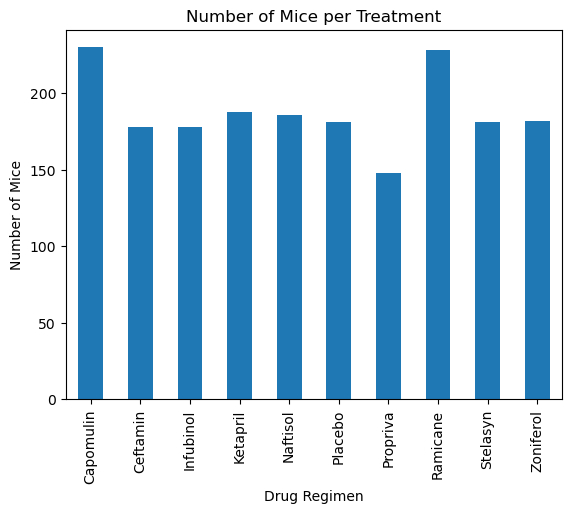

In [17]:
bar_data.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

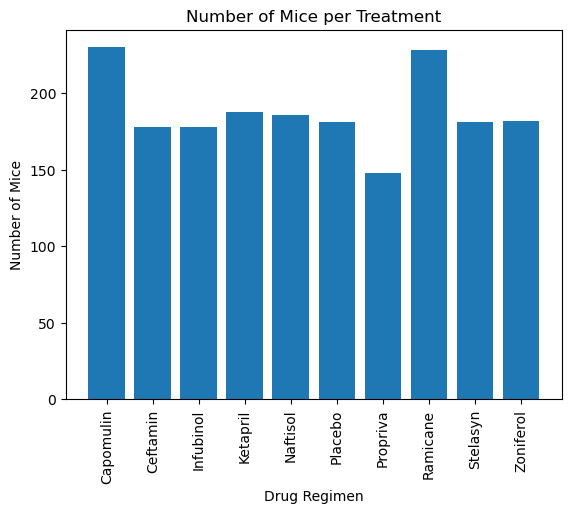

In [18]:
x_axis = bar_data.index.values
y_axis = bar_data.values
plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
plt.show()

In [19]:
sex_data = clean_data["Sex"].value_counts()
sex_data

Male      958
Female    922
Name: Sex, dtype: int64

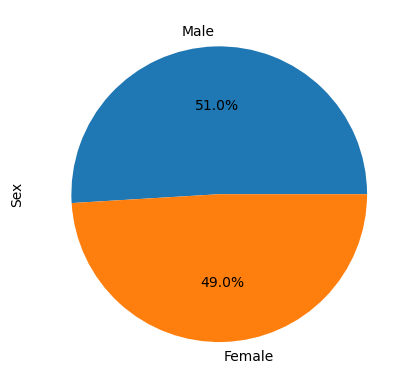

In [20]:
pie = sex_data.plot.pie(y="Sex", autopct='%.01f%%')

Text(0, 0.5, 'Sex')

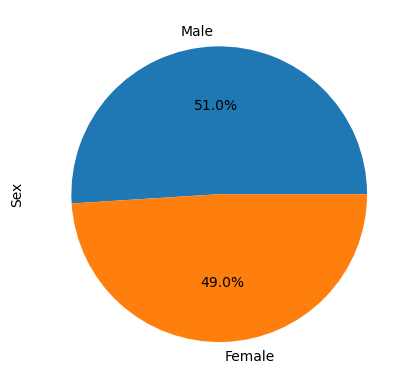

In [21]:
labels = ['Male', 'Female']
y = [51.0, 49.0]
plt.pie(y, labels=labels, autopct='%.01f%%')
plt.ylabel('Sex')

In [22]:
capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
ramicane_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane"]
infubinol_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol"]
ceftamin_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin"]

In [23]:
capomulin_final = capomulin_df.groupby(["Mouse ID"]).max()["Timepoint"]
ramicane_final = ramicane_df.groupby(["Mouse ID"]).max()["Timepoint"]
infubinol_final = infubinol_df.groupby(["Mouse ID"]).max()["Timepoint"]
ceftamin_final = ceftamin_df.groupby(["Mouse ID"]).max()["Timepoint"]

In [43]:
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_list = []
for treatments in treatment_list:
    print(treatments)

Capomulin
Ramicane
Infubinol
Ceftamin


In [99]:
capomulin_last_df = pd.DataFrame(capomulin_final)
capomulin_merged = pd.merge(capomulin_last_df, clean_data, how="left")

ramicane_last_df = pd.DataFrame(ramicane_final)
ramicane_merged = pd.merge(ramicane_last_df, clean_data, how="left")

infubinol_last_df = pd.DataFrame(infubinol_final)
infubinol_merged = pd.merge(infubinol_last_df, clean_data, how="left")

ceftamin_last_df = pd.DataFrame(ceftamin_final)
ceftamin_merged = pd.merge(ceftamin_last_df, clean_data, how="left")

merge1 = pd.merge(ceftamin_last_df, infubinol_last_df, how="left")
merge2 = pd.merge(capomulin_last_df, ramicane_last_df, how="left")
merge3 = pd.merge(merge1, merge2, how="left")
merge4 = pd.merge(merge3, clean_data, how="left")
merge4.head()

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1


In [104]:
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_list = []
tumor = 0
for treatments in treatment_list:

    quartiles = merge4[treatments].quantile([.25, .5, .75])
    lower = quartiles[0.25]
    middle = quartiles[0.5]
    upper = quartiles[0.75]
    iqr = upper-lower
    low_bound = lower - (1.5*iqr)
    high_bound = upper + (1.5*iqr)
    
    if tumor == 0:

        print(f"The {treatments} lower quartile : {lower}")
    print(f"The {treatments} middle quartile: {middle}")
    print(f"The {treatments} upper quartile : {upper}")
    print(f"The {treatments} IQR range: {iqr}")
    print(f"Numbers higher than {high_bound} may be outliers for {treatments}")
    print(f"Numbers lower than {low_bound} may be outliers for {treatments}")

    tumor+=1

KeyError: 'Capomulin'

Text(0.5, 1.0, 'Capomulin Treat of Mouse s185')

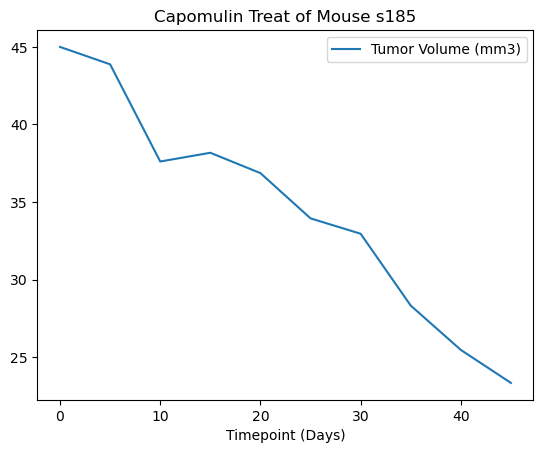

In [58]:
line_data1 = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
line_data2 = line_data1.loc[line_data1["Mouse ID"] == "s185"]
line_data3 = pd.DataFrame({
    "Tumor Volume (mm3)": [45.000000, 43.878496, 37.614948, 38.177232, 36.866876, 33.949940, 32.959671, 28.328531, 25.472143, 23.343598]}, 
    index=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
line_data3.plot.line()
plt.xlabel("Timepoint (Days)")
plt.title("Capomulin Treat of Mouse s185")

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

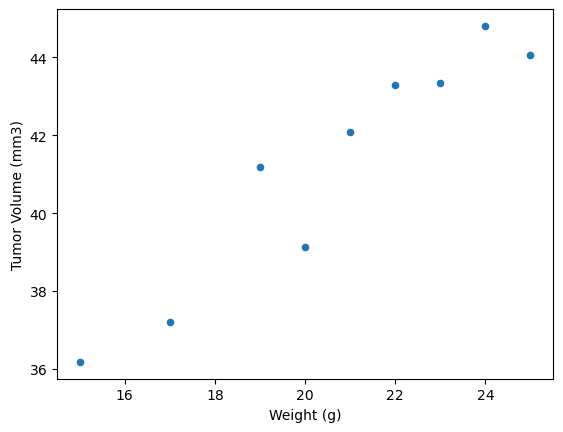

In [88]:
scatterp = line_data1.groupby(["Weight (g)"]).mean()["Tumor Volume (mm3)"]
scatterp1 = pd.DataFrame(scatterp)
scatterp1=scatterp1.reset_index()
scatterp1.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")

SyntaxError: unexpected EOF while parsing (3888254224.py, line 1)